# **Reducción de la dimensionalidad**

In [3]:

# Librerías
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

La reducción de dimensionalidad es una técnica esencial que permite simplificar los modelos al reducir el número de variables de entrada, conocidas como características. Esto no solo ayuda a mejorar el rendimiento del modelo al reducir la complejidad y evitar el sobreajuste, sino que también facilita la visualización y la comprensión de los datos.

# PCA

Análisis de Componentes Principales

El PCA es uno de los métodos más populares y sencillos para la reducción de dimensionalidad. Identifica la dirección de máxima varianza en los datos y proyecta los datos originales a lo largo de estas nuevas direcciones, o componentes principales. Estas nuevas direcciones son ortogonales entre sí y capturan la mayor cantidad de información posible con el menor número de componentes.

In [5]:
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # inicializar el conjunto de datos 3D
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # distribución desigual
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # añadir más ruido
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # cambiar un poco

In [8]:
X  # es una matriz dos dimensiones, con tres columnas

array([[-0.47562927, -1.18002627, -0.18665138],
       [-0.32908278,  0.18101846, -0.32767249],
       [ 1.1241412 ,  0.33792292,  0.15481443],
       [ 0.28072425, -0.21472162,  0.43963185],
       [-0.59903727, -0.94120105,  0.06412454],
       [-0.19688428, -0.59920621,  0.01191996],
       [-0.49635908, -1.18078845,  0.17385141],
       [ 0.57308241,  0.89868775,  0.66600244],
       [ 0.59410487, -0.55817151,  0.2549555 ],
       [ 1.17064931,  0.37224377,  0.80362823],
       [-1.1730746 , -1.04622548, -0.08061077],
       [-0.60011541, -0.3620432 , -0.50511579],
       [ 0.4963413 ,  0.74149446,  0.76848193],
       [-0.39977922, -0.95243354, -0.15466053],
       [-0.35448133, -0.44161974, -0.07728984],
       [-0.42846627, -0.63087978,  0.31216388],
       [-0.48357266, -0.92949165, -0.12834249],
       [-0.30000318, -0.94201494,  0.07449738],
       [-0.14919128, -0.76135868, -0.35919894],
       [-0.42432217, -0.85484973, -0.22736351],
       [ 0.29610766, -0.47325168,  0.672

Trazar el conjunto de datos 3D, con el plano de proyección.

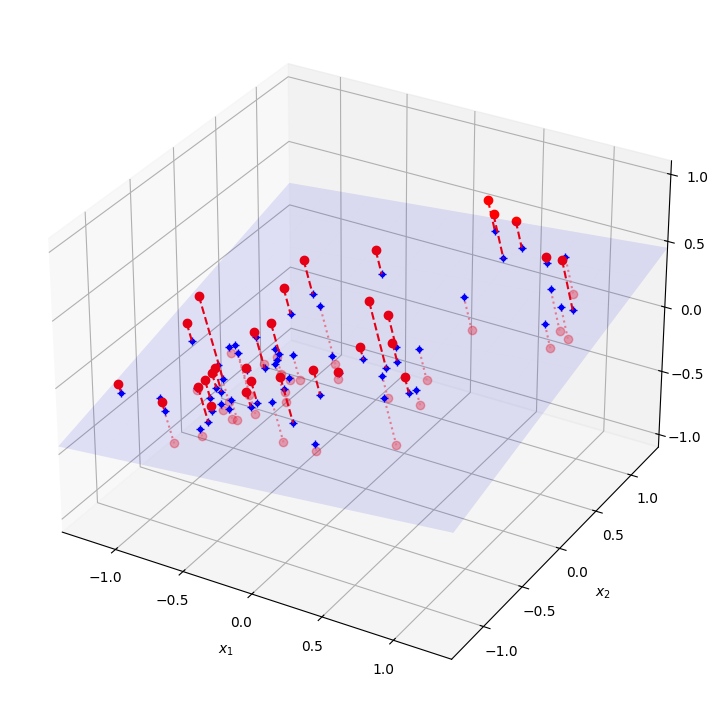

In [6]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # conjunto de datos reducido a 2D
X3D_inv = pca.inverse_transform(X2D)  # Posición 3D de las muestras proyectadas
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # coefs del plano de proyección
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # avión
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # muestras sobre plano
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # muestras bajo plano

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# trazar primero las muestras y las líneas de proyección por debajo del plano
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # plano de proyección
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # muestras proyectadas
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# ahora trazar líneas de proyección y muestras sobre el plano
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

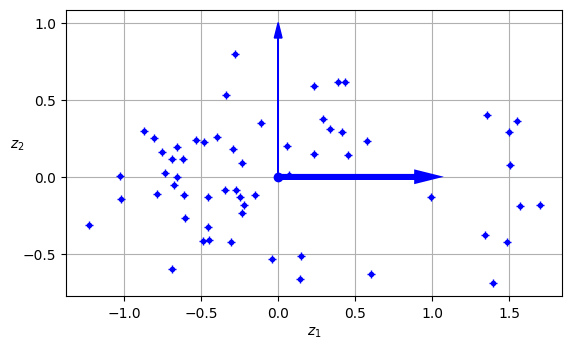

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)

____________________________
pasamos a otro ejemplo. 

In [10]:
from sklearn.datasets import make_swiss_roll   # rollo suizo es una imagen muy mona...

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

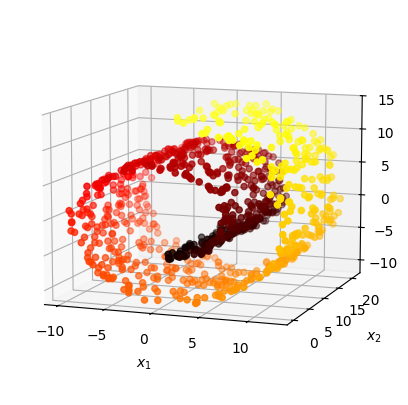

In [11]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
plt.show()

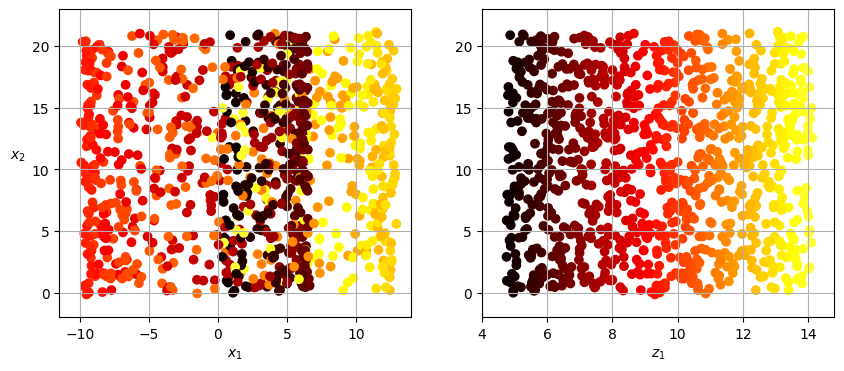

In [12]:

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

plt.show()

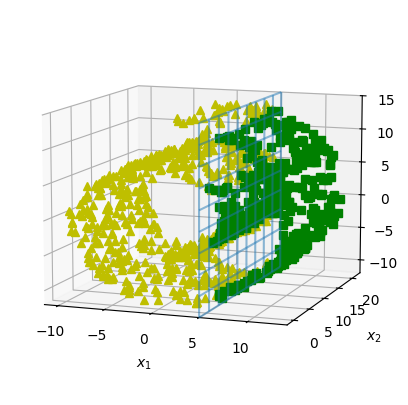

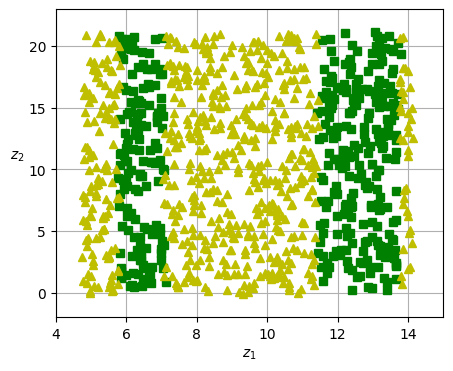

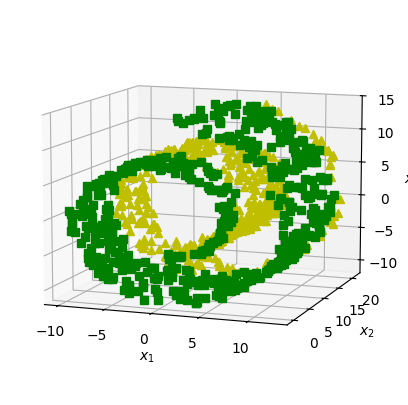

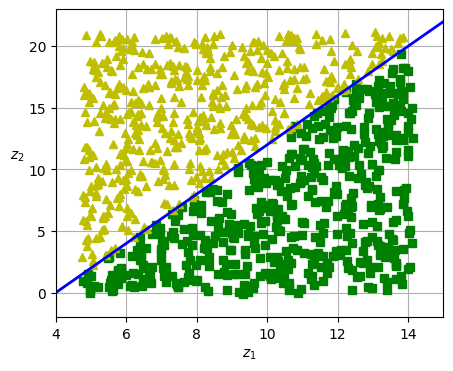

In [13]:
    
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.show()

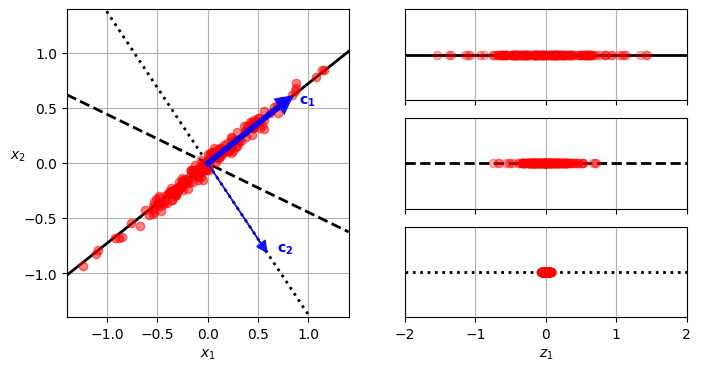

In [14]:

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # estire
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # girar

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

plt.show()

- Panel Izquierdo:

    + Espacio Original (X1, X2): Se muestra una nube de puntos (en rojo) en un espacio bidimensional. Las líneas azul (C2) y roja (C1) representan los dos primeros componentes principales, es decir, las direcciones en las cuales los datos tienen la mayor varianza. Estas líneas son ortogonales entre sí y forman un nuevo sistema de coordenadas para los datos.
    + Puntos y Direcciones: La línea roja (C1) captura la mayor parte de la variación de los datos, mientras que la línea azul (C2) captura la variación restante en una dirección perpendicular a C1.

- Panel Derecho:

    + Proyecciones en Componentes Principales (Z1): Muestra las proyecciones de los datos en los componentes principales identificados en el panel izquierdo.
    + Primera fila: Representa las proyecciones sobre el primer componente principal (C1). Aquí, los datos están alineados a lo largo de una línea horizontal, mostrando la distribución de las proyecciones en C1.
    + Segunda fila: Representa las proyecciones sobre el segundo componente principal (C2). Como la variación a lo largo de C2 es menor, los puntos están más agrupados cerca del cero.
    + Tercera fila: Esencialmente, muestra una vista donde la varianza es mínima, indicando que este componente no es relevante para explicar la variabilidad de los datos.

- Interpretación:

    + Importancia de los Componentes: El primer componente principal (C1) es significativamente más importante en términos de explicar la varianza de los datos, lo cual es evidente en la dispersión de los puntos a lo largo de este componente en el panel derecho.
    + Reducción de Dimensionalidad: Si se selecciona únicamente el primer componente principal para futuros análisis, se preserva la mayor parte de la información significativa mientras se reduce la dimensionalidad de los datos.

## Principal Components

In [15]:

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

Nota: en principio, el algoritmo de factorización SVD devuelve tres matrices, **U**, **Σ** y **V**, tales que **X** = **UΣV**<sup>⊺</sup>, donde **U** es una matriz _m_ × _m_, **Σ** es una matriz _m_ × _n_, y **V** es una matriz _n_ × _n_. Pero la función `svd()` devuelve **U**, **s** y **V**<sup>⊺</sup> en su lugar. **s** es el vector que contiene todos los valores de la diagonal principal de las _n_ filas superiores de **Σ**. Desde **Σ** está lleno de ceros en otros lugares, usted puede reconstruir fácilmente a partir de **s**, de esta manera:

In [16]:
# muestra cómo construir Σ a partir de s
m, n = X.shape
Σ = np.zeros_like(X_centered)
Σ[:n, :n] = np.diag(s)
assert np.allclose(X_centered, U @ Σ @ Vt)

## Proyección a dimensiones d

In [17]:
W2 = Vt[:2].T
X2D = X_centered @ W2

In [24]:
X2D

array([[-8.73231190e-01, -2.94598030e-01],
       [ 1.48885182e-01,  5.14935573e-01],
       [ 1.35121872e+00, -3.99501548e-01],
       [ 4.54366763e-01, -1.39984497e-01],
       [-7.34389086e-01, -2.28934648e-02],
       [-2.33347464e-01, -8.67844755e-02],
       [-8.08435321e-01, -2.52457557e-01],
       [ 1.48281454e+00,  4.22796305e-01],
       [ 3.85679006e-01, -6.16229365e-01],
       [ 1.54972180e+00, -3.60381563e-01],
       [-1.22938760e+00,  3.12504780e-01],
       [-4.54653275e-01,  3.28839370e-01],
       [ 1.34315899e+00,  3.79446240e-01],
       [-6.55233341e-01, -1.92367174e-01],
       [-2.49510114e-01,  1.28486810e-01],
       [-3.46562831e-01,  8.32312189e-02],
       [-6.90221113e-01, -1.13712645e-01],
       [-5.29757591e-01, -2.40403321e-01],
       [-3.96344855e-01, -2.60334107e-01],
       [-6.19519220e-01, -1.13588889e-01],
       [ 3.34910399e-01, -3.09476565e-01],
       [-4.52441114e-01,  1.28501562e-01],
       [-1.02718730e+00, -7.20555799e-03],
       [ 2.

## Uso de Scikit-Learn

Con Scikit-Learn, PCA es realmente trivial. Incluso se encarga de centrar la media por ti:

In [25]:

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [26]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

## Razón de varianza explicada

Ahora veamos el ratio de varianza explicada:

In [ ]:
pca.explained_variance_ratio_  # esto es la varianza que explica cada decisión sobre las lineas C1, la segunda C2, y C3 la desechamos.

array([0.7578477 , 0.15186921])

La primera dimensión explica alrededor del 76% de la varianza, mientras que la segunda explica alrededor del 15%.

Al proyectar a 2D, perdimos alrededor del 9% de la varianza:

In [28]:
1 - pca.explained_variance_ratio_.sum() 

np.float64(0.09028309326742046)

## Elegir el número correcto de dimensiones

In [29]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 

In [31]:
X_train.shape

(60000, 784)

In [32]:
d

np.int64(154)

In [33]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_   #mismo numero que d, ya que internamente el método PCA, toma ese hiperparámetro y te devuelve 
        #aquello que es mayor o igual que 0.95, confianza. 

np.int64(154)

In [35]:
pca.explained_variance_ratio_.sum()

np.float64(0.9501960192613031)

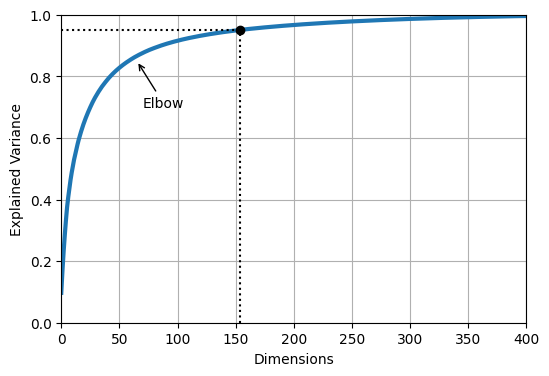

In [28]:

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

agv_El codo es un punto de inflexión a partir del cual cluster (el número de clusterizaciones) es el óptimo en el aprendizaje "no supervisado". 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [37]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': np.int64(475), 'pca__n_components': np.int64(57)}


In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [39]:
grid_search.best_params_

{'pca__n_components': np.int64(67)}

## PCA para compresión

Cómo funciona el PCA para compresión de datos:
1. Estandarización: Primero, se centran y estandarizan los datos para que cada característica tenga media cero y varianza uno.

2. Cálculo de la matriz de covarianza: Luego, se calcula la matriz de covarianza para evaluar cómo varían conjuntamente las características.

3. Cálculo de los valores y vectores propios: Se calculan los valores y vectores propios de la matriz de covarianza. Los vectores propios indican las direcciones de máxima varianza en los datos, y los valores propios correspondientes indican la magnitud de esa varianza.

4. Selección de componentes: Se seleccionan los componentes principales (los vectores propios con los valores propios más grandes) hasta cubrir un porcentaje deseado de la varianza total de los datos.

5. Transformación de los datos: Finalmente, los datos originales se proyectan sobre los componentes principales seleccionados para obtener una representación de menor dimensión.

Ventajas del PCA para compresión:

- Reducción del ruido: Al eliminar las componentes con menor varianza, es posible que se elimine también el ruido de los datos.
- Ahorro de recursos: Menor cantidad de dimensiones significa menos requerimientos de almacenamiento y computación.
- Visualización: Reducir a dos o tres dimensiones permite visualizar los datos de alta dimensión.

Desventajas:

- Pérdida de información: Al descartar componentes, se puede perder información relevante.
- Sensibilidad a la normalización: La manera en cómo se estandarizan los datos puede afectar los resultados.
- Interpretabilidad: Las dimensiones resultantes del PCA no siempre tienen una interpretación directa.

In [40]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [34]:
X_recovered = pca.inverse_transform(X_reduced)

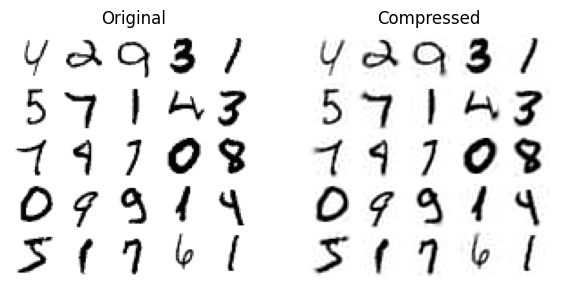

In [35]:

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")


## Randomized PCA

In [36]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## Incremental PCA

``IncrementalPCA`` es una variante del Análisis de Componentes Principales (PCA) diseñada para manejar grandes conjuntos de datos que no caben en memoria o para aplicaciones en línea donde los datos continúan llegando en incrementos. Esta técnica es útil para grandes volúmenes de datos o flujos de datos en tiempo real, donde el cálculo del PCA convencional sería impracticable debido a su requerimiento de tener acceso completo a todo el conjunto de datos de una sola vez.

In [37]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

**Usando la clase `memmap` de NumPy - un mapa de memoria a un array almacenado en un fichero binario en disco.**

Creemos la instancia `memmap`, copiemos el conjunto de entrenamiento MNIST en ella, y llamemos a `flush()` que asegura que cualquier dato aún en la caché se guarda en el disco. Esto lo haría típicamente un primer programa:

In [38]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train  # podría ser un bucle en su lugar, guardando los datos trozo a trozo
X_mmap.flush()

A continuación, otro programa cargaría los datos y los utilizaría para el entrenamiento:

In [40]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

# Random Projection

La proyección aleatoria es una técnica de reducción de dimensionalidad que pertenece a la familia de los métodos de transformación lineal. La idea básica detrás de la proyección aleatoria es reducir la dimensionalidad de los datos proyectándolos en un subespacio de dimensiones más bajas, utilizando una matriz aleatoria cuyas columnas tienen la propiedad de ser ortogonales entre sí con alta probabilidad. Esta técnica es muy eficiente computacionalmente y ha sido teorizada y probada bajo el lema de Johnson-Lindenstrauss.

In [39]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, ε = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=ε)
d

7300

In [41]:
# mostrar la ecuación calculada por johnson_lindenstrauss_min_dim
d = int(4 * np.log(m) / (ε ** 2 / 2 - ε ** 3 / 3))
d

7300

In [42]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)  # std dev = raíz cuadrada de la varianza

X = np.random.randn(m, n)  # generar un conjunto de datos falso
X_reduced = X @ P.T

In [43]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=ε, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)  # mismo resultado que el anterior

In [41]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

In [42]:
# comparación de resultados entre RP gaussiano y RP disperso

from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print("SparseRandomProjection fit")
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection transform")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform")
%timeit sparse_rnd_proj.transform(X)

GaussianRandomProjection fit
4.05 s ± 327 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
3.85 s ± 647 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection transform
11.1 s ± 507 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
5.37 s ± 640 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# LLE

El Locally Linear Embedding (LLE) es un método de reducción de dimensionalidad no lineal que es especialmente útil para explorar la estructura de datos de alta dimensión que yacen en manifolds de baja dimensión. A diferencia de otros métodos lineales como PCA, LLE intenta mantener las relaciones locales entre los puntos en un espacio de baja dimensión.

In [43]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

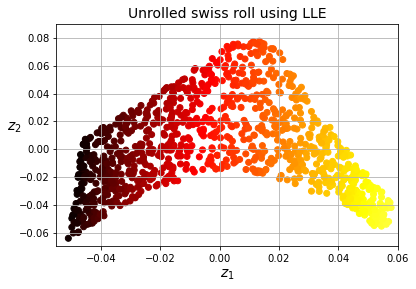

In [44]:

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()

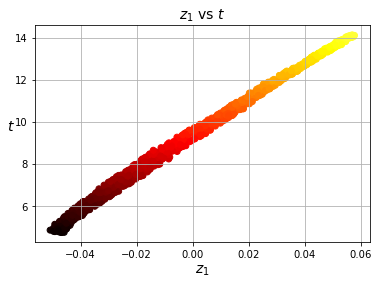

In [45]:
# muestra la correlación entre z1 y t: LLE funcionó bien
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

In [44]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [47]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

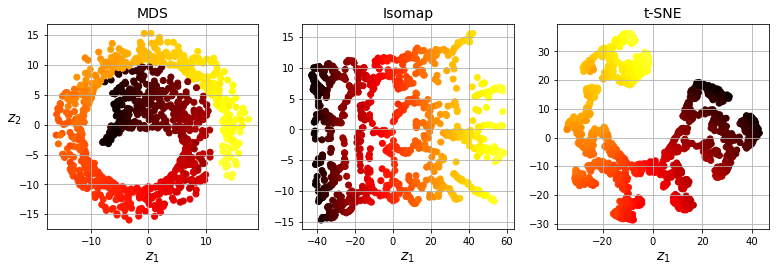

In [49]:

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

# Kernel PCA

El Kernel PCA es una extensión del análisis de componentes principales (PCA) que utiliza técnicas de kernel para realizar reducciones de dimensionalidad en datos no lineales. Mientras que el PCA estándar puede encontrar las principales direcciones de variación en un conjunto de datos linealmente distribuidos, Kernel PCA es capaz de capturar estructuras complejas en los datos aplicando transformaciones no lineales.

In [50]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X_swiss)

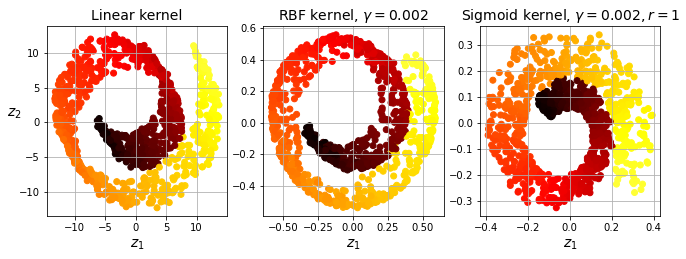

In [51]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.002)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.002, coef0=1)

kernel_pcas = ((lin_pca, "Linear kernel"),
               (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(11, 3.5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X_swiss)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()

plt.show()